In [1]:
import os
import shutil
import glob
import matplotlib.pyplot as plt
import pygal 
from IPython.display import display, HTML

In [3]:
train_data = "./data/data"

#Create function to display interactive plotting
base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))
    
#Compare class distribution
line_chart = pygal.Bar(height=300)
line_chart.title = 'Total Dataset Distribution'
for o in os.listdir(train_data):
    line_chart.add(o, len(os.listdir(os.path.join(train_data, o))))
galplot(line_chart)

In [4]:
#Confirm Folder Structure
for root, dirs, files in os.walk(train_data):
    level = root.replace(os.getcwd(), '').count(os.sep)
    print('{0}{1}/'.format('    ' * level, os.path.basename(root)))
    for f in files[:2]:
        print('{0}{1}'.format('    ' * (level + 1), f))
    if level is not 0:
        print('{0}{1}'.format('    ' * (level + 1), "..."))    

        data/
            ...
            beta/
                exp13834.jpg
                exp76060.jpg
                ...
            pm/
                exp40288.jpg
                exp55691.jpg
                ...
            Delta/
                Delta_78731.jpg
                exp76060.jpg
                ...
            gamma/
                exp57092.jpg
                gamma_61305.jpg
                ...
            infty/
                exp57092.jpg
                exp44950.jpg
                ...
            rightarrow/
                exp46821.jpg
                exp23713.jpg
                ...
            div/
                div_61398.jpg
                div_843.jpg
                ...
            gt/
                exp48.jpg
                exp86387.jpg
                ...
            forward_slash/
                _94831.jpg
                _103114.jpg
                ...
            leq/
                leq_31697.jpg
                exp57910.jpg
                .

In [5]:
import math
import re
import sys

#Train and Test Set Variables
train_val_test_ratio = (.7,.15,.15) # 70/10/20 Data Split
test_folder = './data/test/'
train_folder = './data/train/'
val_folder = './data/val/'

file_names = os.listdir('./data/data')

#Remove Existing Folders if they exist
for folder in [test_folder, train_folder, val_folder]:
    if os.path.exists(folder) and os.path.isdir(folder):
        shutil.rmtree(folder)

#Remake Category Folders in both Train and Test Folders
for category in file_names:
    os.makedirs(test_folder + category)
    os.makedirs(train_folder + category)
    os.makedirs(val_folder + category)

#Split Data by Train Ratio and copy files to correct directory
for idx, category in enumerate(file_names):
    file_list = os.listdir(train_data + '/' + category)
    
    train_ratio = math.floor(len(file_list) * train_val_test_ratio[0])
    val_ratio = math.floor(len(file_list) * train_val_test_ratio[1])
    train_list = file_list[:train_ratio]
    val_list = file_list[train_ratio:train_ratio + val_ratio]
    test_list = file_list[train_ratio + val_ratio:]
    
    for i, file in enumerate(train_list):
        shutil.copy(train_data + '/' + category + '/' + file, train_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s train images to category folder %s' % (len(train_list), category))  
    sys.stdout.write('\n')
    for i, file in enumerate(val_list):
        shutil.copy(train_data + '/' + category + '/' + file, val_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s validation images to category folder %s' % (len(val_list), category))                   
    sys.stdout.write('\n')
    for i, file in enumerate(test_list):
        shutil.copy(train_data + '/' + category + '/' + file, test_folder + '/' + category + '/' + file)
    sys.stdout.write('Moving %s test images to category folder %s' % (len(test_list), category))
    sys.stdout.write('\n')
    
print("Done.")  

Moving 1417 train images to category folder beta
Moving 303 validation images to category folder beta
Moving 305 test images to category folder beta
Moving 561 train images to category folder pm
Moving 120 validation images to category folder pm
Moving 121 test images to category folder pm
Moving 95 train images to category folder Delta
Moving 20 validation images to category folder Delta
Moving 22 test images to category folder Delta
Moving 286 train images to category folder gamma
Moving 61 validation images to category folder gamma
Moving 62 test images to category folder gamma
Moving 1248 train images to category folder infty
Moving 267 validation images to category folder infty
Moving 268 test images to category folder infty
Moving 1192 train images to category folder rightarrow
Moving 255 validation images to category folder rightarrow
Moving 256 test images to category folder rightarrow
Moving 607 train images to category folder div
Moving 130 validation images to category folde

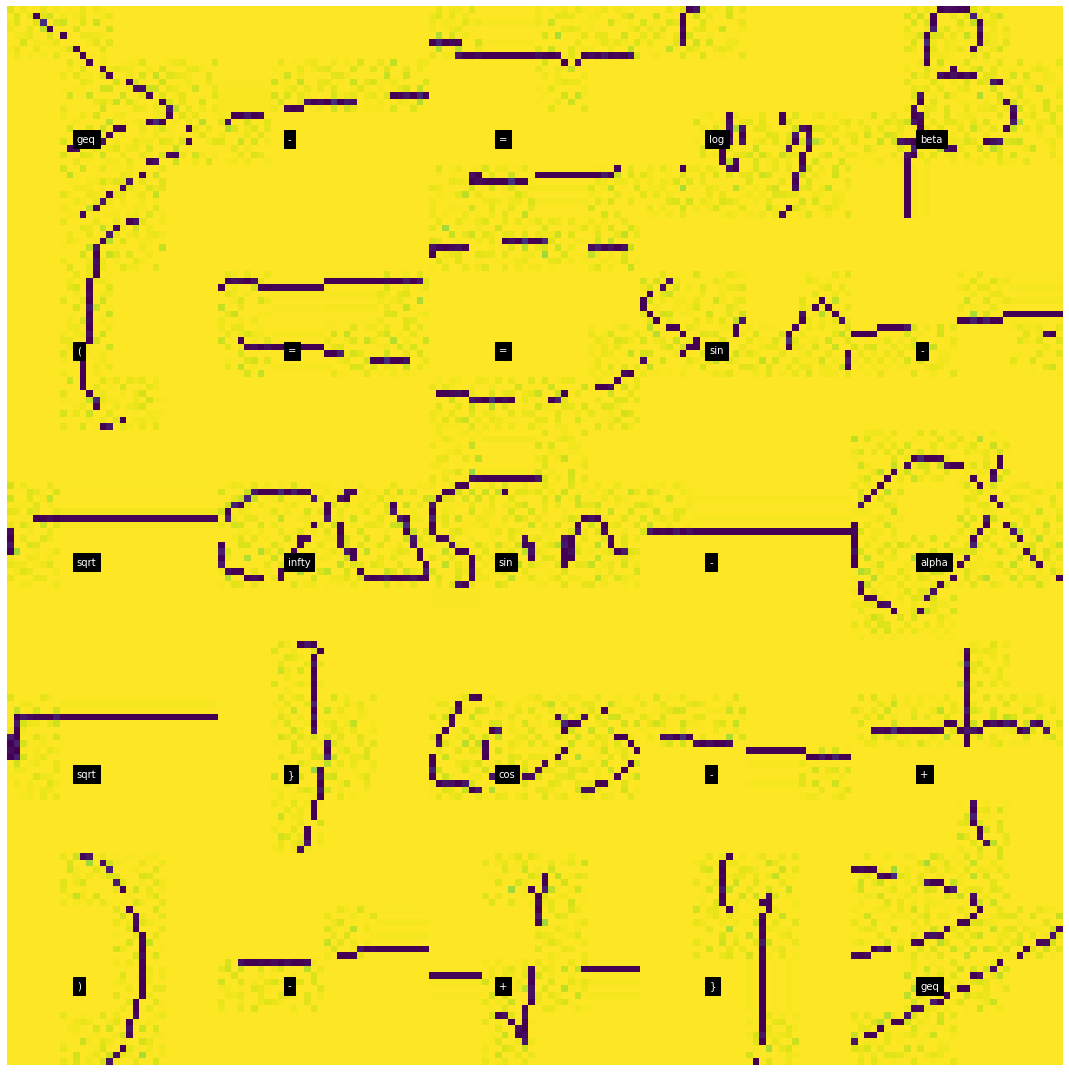

In [8]:
import vmmr_utils
from functools import partial
from multiprocessing import Pool

#Resize Images
if __name__ == '__main__':
    pool = Pool()
    image_list = glob.glob(train_folder + "/*/*")
    func = partial(vmmr_utils.resize_image, size=32)
    pool.map(func, image_list)
    pool.close()

vmmr_utils.display_images(train_folder)

In [9]:
#Compare class distribution
line_chart = pygal.Bar(height=300)
line_chart.title = 'Training Class Distribution'
for o in os.listdir(train_folder):
    line_chart.add(o, len(os.listdir(os.path.join(train_folder, o))))
galplot(line_chart)  

In [10]:
#Compare class distribution
line_chart = pygal.Bar(height=300)
line_chart.title = 'Test Class Distribution'
for o in os.listdir(test_folder):
    line_chart.add(o, len(os.listdir(os.path.join(test_folder, o))))
galplot(line_chart)  

In [11]:
import pygal 
#Compare class distribution
val_folder = './data/val/'
line_chart = pygal.Bar(height=300)
line_chart.title = 'Velidation Class Distribution'
for o in os.listdir(val_folder):
    line_chart.add(o, len(os.listdir(os.path.join(val_folder, o))))
galplot(line_chart)  

In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input, decode_predictions

WIDTH=32
HEIGHT=32
BATCH_SIZE=128
test_dir = './data/test/'
train_dir = './data/train/'
val_dir = './data/val/'

#Train DataSet Generator with Augmentation
print("\nTraining Data Set")
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
train_flow = train_generator.flow_from_directory(
    train_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size = BATCH_SIZE
)

#Validation DataSet Generator with Augmentation
print("\nValidation Data Set")
val_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
val_flow = val_generator.flow_from_directory(
    val_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size = BATCH_SIZE
)

#Test DataSet Generator with Augmentation
print("\nTest Data Set")
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_flow = test_generator.flow_from_directory(
    test_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size = BATCH_SIZE
)

Using TensorFlow backend.
/Users/apple/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/apple/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/apple/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/apple/anaconda3/lib/python3.7/site-packages/tenso


Training Data Set
Found 111394 images belonging to 46 classes.

Validation Data Set
Found 23852 images belonging to 46 classes.

Test Data Set
Found 23919 images belonging to 46 classes.


In [14]:
from __future__ import division, print_function, absolute_import
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Convolution2D, MaxPooling2D, Dropout
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [15]:
model = Sequential()

model.add(Convolution2D(64, kernel_size=3, activation='relu', input_shape=(WIDTH,HEIGHT,3)))
#model.add(Convolution2D(100, 5, 5, border_mode='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('tanh'))

model.add(Convolution2D(250, 5, 5, border_mode='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('tanh'))

model.add(Flatten())
model.add(Dense(1000))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(46))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
model.summary()

/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(250, (5, 5), padding="valid")`
  


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 250)       400250    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 250)         0         
_________________________________________________________________
activation_2 (Activation)    (None, 5, 5, 250)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6250)             

In [16]:
import math
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger
top_layers_file_path="model.h5"

checkpoint = ModelCheckpoint(top_layers_file_path, monitor='loss', verbose=1, save_best_only=True, mode='min')
tb = TensorBoard(log_dir='./logs', batch_size=val_flow.batch_size, write_graph=True, update_freq='batch')
early = EarlyStopping(monitor="loss", mode="min", patience=5)
csv_logger = CSVLogger('./logs/iv3-log.csv', append=True)

history = model.fit_generator(train_flow, 
                              epochs=12, 
                              verbose=1,
                              validation_data=val_flow,
                              validation_steps=math.ceil(val_flow.samples/val_flow.batch_size),
                              steps_per_epoch=math.ceil(train_flow.samples/train_flow.batch_size),
                              callbacks=[checkpoint, early, tb, csv_logger])




Epoch 1/12
  1/871 [..............................] - ETA: 48:54 - loss: 3.8034 - accuracy: 0.0000e+00WARNING:tensorflow:From /Users/apple/anaconda3/lib/python3.7/site-packages/keras/callbacks/tensorboard_v1.py:343: The name tf.Summary is deprecated. Please use tf.compat.v1.Summary instead.

871/871 [==============================] - 1905s 2s/step - loss: 0.3768 - accuracy: 0.9003 - val_loss: 0.1832 - val_accuracy: 0.9592

Epoch 00001: loss improved from inf to 0.37628, saving model to model.h5
Epoch 2/12
871/871 [==============================] - 1731s 2s/step - loss: 0.1368 - accuracy: 0.9617 - val_loss: 0.0884 - val_accuracy: 0.9747

Epoch 00002: loss improved from 0.37628 to 0.13689, saving model to model.h5
Epoch 3/12
871/871 [==============================] - 1811s 2s/step - loss: 0.0953 - accuracy: 0.9728 - val_loss: 0.0688 - val_accuracy: 0.9802

Epoch 00003: loss improved from 0.13689 to 0.09535, saving model to model.h5
Epoch 4/12
871/871 [==============================] -

In [17]:
model.save('model.h5')
model.load_weights('model.h5')
loss, acc = model.evaluate_generator(
    test_flow,
    verbose = True,
    steps=math.ceil(test_flow.samples/test_flow.batch_size))
print("Loss: ", loss)
print("Acc: ", acc)

187/187 [==============================] - 182s 976ms/step
Loss:  0.05452001094818115
Acc:  0.9908859133720398


In [18]:
label = [k for k,v in train_flow.class_indices.items()]
with open('iv3-labels.txt', 'w+') as file:
    file.write("\n".join(label))

In [19]:
from keras.preprocessing import image
import numpy as np
import os
import glob
import random

import numpy as np
# import the monthly average values from `avg-monthly-precip.txt` as a numpy array
avg_monthly_precip = np.genfromtxt("iv3-labels.txt",dtype='str')
label=avg_monthly_precip
    
file_list = glob.glob("./data/test/*/*")
img_path = random.choice(file_list)
img_cat = os.path.split(os.path.dirname(img_path))[1]
print("Image Category: ", img_cat)
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
#print("Raw Predictions: ", preds)

top_x = 3
top_args = preds[0].argsort()[-top_x:][::-1]
preds_label = [label[p] for p in top_args]
print("\nTop " + str(top_x) + " confidence: " + " ".join(map(str, sorted(preds[0])[-top_x:][::-1])))
print("Top " + str(top_x) + " labels: " + " ".join(map(str, preds_label)))

number=preds_label[0]
#loop through csv list
with open("labels.csv") as f:
    for l, i in enumerate(f):
        data = i.split(",")
        if data[0] == number:
            print(data)

Image Category:  +

Top 3 confidence: 1.0 4.1450693e-10 3.0587094e-10
Top 3 labels: + exists neq
['+', '', 'Symbol', '', '\n']


In [20]:
from tensorflow.python.framework import graph_util
from tensorflow.python.framework import graph_io
from keras import backend as K
from keras import optimizers, models

top_layers_file_path="model.h5"
input_model_path = top_layers_file_path
output_model_name = "top_layers.iv3.pb"
output_model_dir = "tf_model"

K.set_learning_phase(0)
sess = K.get_session()

test_model = models.load_model(input_model_path)
orig_output_node_names = [node.op.name for node in test_model.outputs]

constant_graph = graph_util.convert_variables_to_constants(
    sess,
    sess.graph.as_graph_def(),
    orig_output_node_names)
graph_io.write_graph(
    constant_graph,
    output_model_dir,
    output_model_name,
    as_text=False)

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.


'tf_model/top_layers.iv3.pb'

In [21]:
from keras.models import load_model
model = load_model('model.h5')

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
#Test DataSet Generator with Augmentation
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_flow = test_generator.flow_from_directory(
    './data/test',
    shuffle=False,
    target_size=(32, 32),
    batch_size = 32
)

Found 23919 images belonging to 46 classes.


In [22]:
import math
import numpy as np
predictions = model.predict_generator(
    test_flow,
    verbose=1,
    steps=math.ceil(test_flow.samples/test_flow.batch_size))
predicted_classes = np.argmax(predictions, axis=1) 

true_classes = test_flow.classes
class_labels = list(test_flow.class_indices.keys())  

748/748 [==============================] - 197s 264ms/step


0 : !
1 : (
2 : )
3 : +
4 : ,
5 : -
6 : =
7 : Delta
8 : [
9 : ]
10 : alpha
11 : ascii_124
12 : beta
13 : cos
14 : div
15 : exists
16 : forall
17 : forward_slash
18 : gamma
19 : geq
20 : gt
21 : in
22 : infty
23 : int
24 : lambda
25 : ldots
26 : leq
27 : lim
28 : log
29 : lt
30 : mu
31 : neq
32 : phi
33 : pi
34 : pm
35 : prime
36 : rightarrow
37 : sigma
38 : sin
39 : sqrt
40 : sum
41 : tan
42 : theta
43 : times
44 : {
45 : }


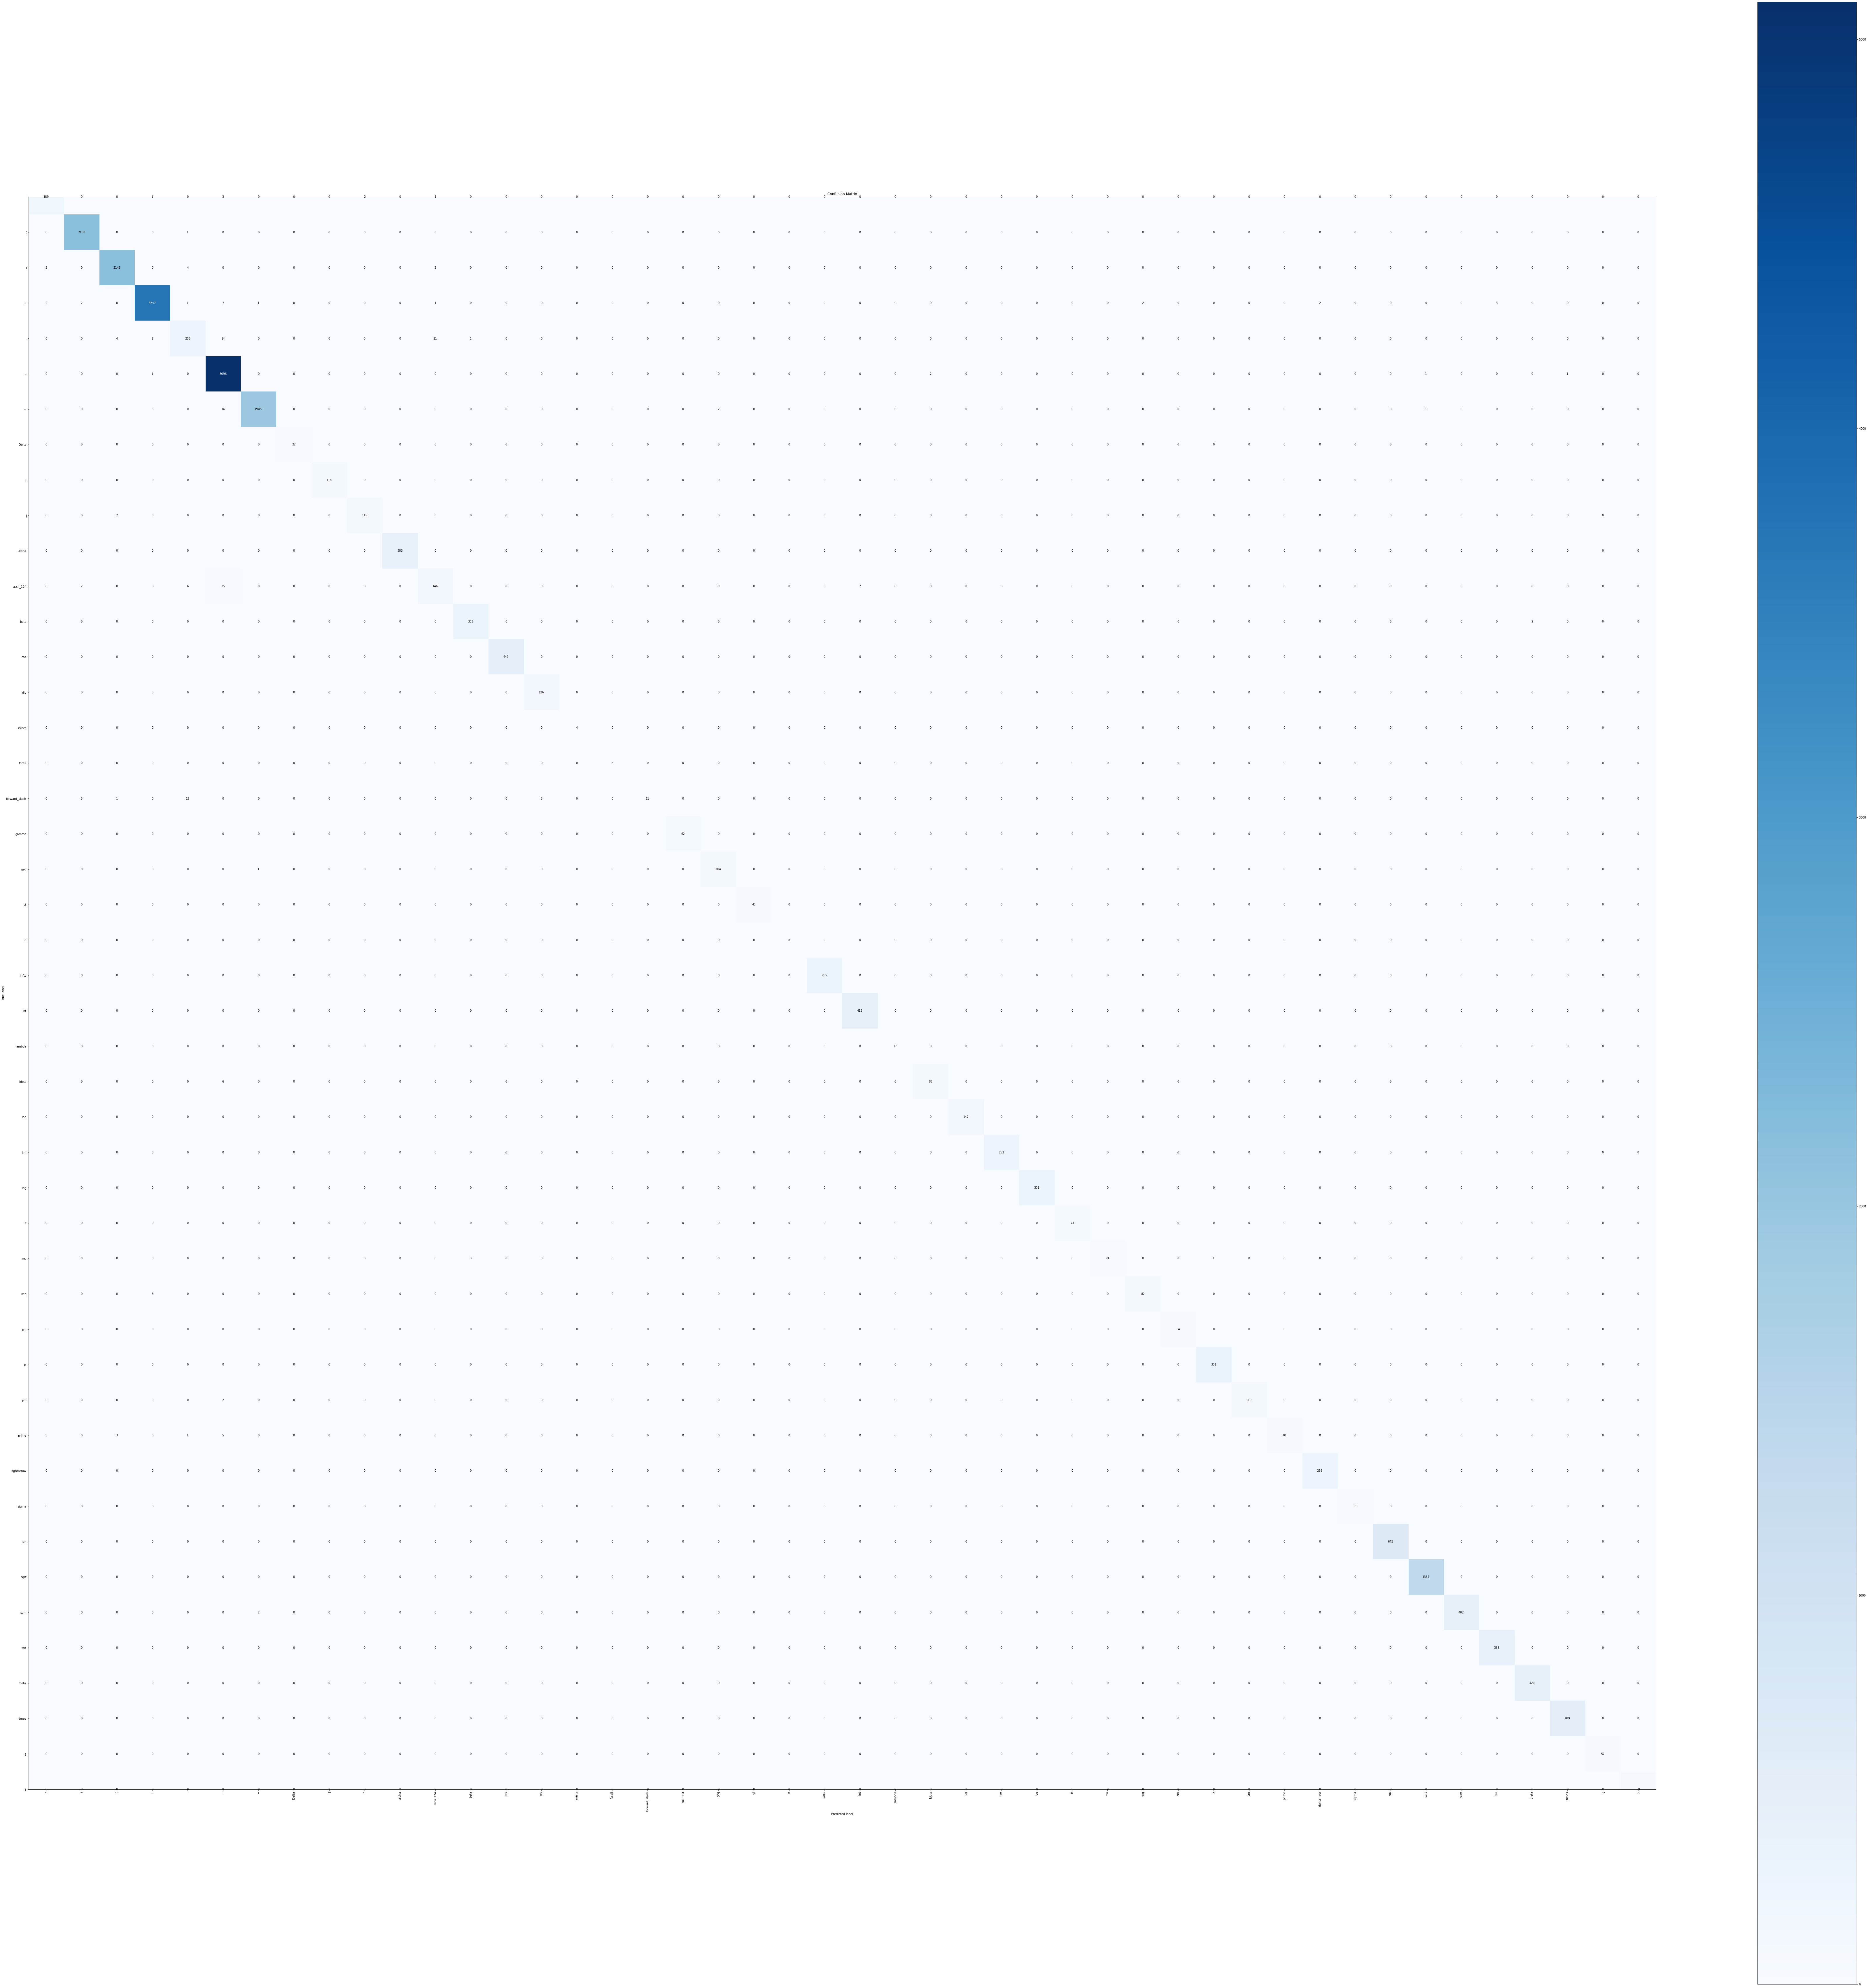

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline  
import scikitplot as skplt

[print(k, ":", v) for k,v in enumerate(class_labels)]
true_map_classes = [class_labels[x] for x in true_classes]
predicted_map_classes = [class_labels[x] for x in predicted_classes]

skplt.metrics.plot_confusion_matrix(
    true_map_classes, 
    predicted_map_classes,
    labels=class_labels,
    x_tick_rotation=90,
    figsize=(125,125))

In [24]:
from sklearn.metrics import classification_report
report = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels)
print(report)

               precision    recall  f1-score   support

            !       0.94      0.96      0.95       196
            (       1.00      1.00      1.00      2145
            )       1.00      1.00      1.00      2154
            +       0.99      0.99      0.99      3768
            ,       0.91      0.89      0.90       287
            -       0.98      1.00      0.99      5101
            =       1.00      0.99      0.99      1967
        Delta       1.00      1.00      1.00        22
            [       1.00      1.00      1.00       118
            ]       0.98      0.98      0.98       117
        alpha       1.00      1.00      1.00       383
    ascii_124       0.87      0.72      0.79       202
         beta       0.99      0.99      0.99       305
          cos       1.00      1.00      1.00       449
          div       0.98      0.96      0.97       131
       exists       1.00      1.00      1.00         4
       forall       1.00      1.00      1.00         8
forward_s

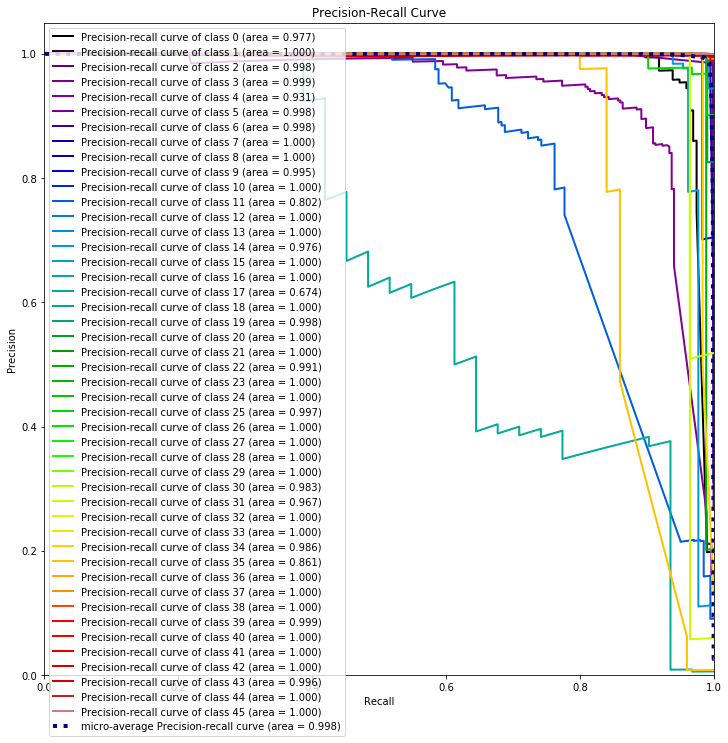

In [25]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(
    true_classes,
    predictions,
    figsize=(12,12))

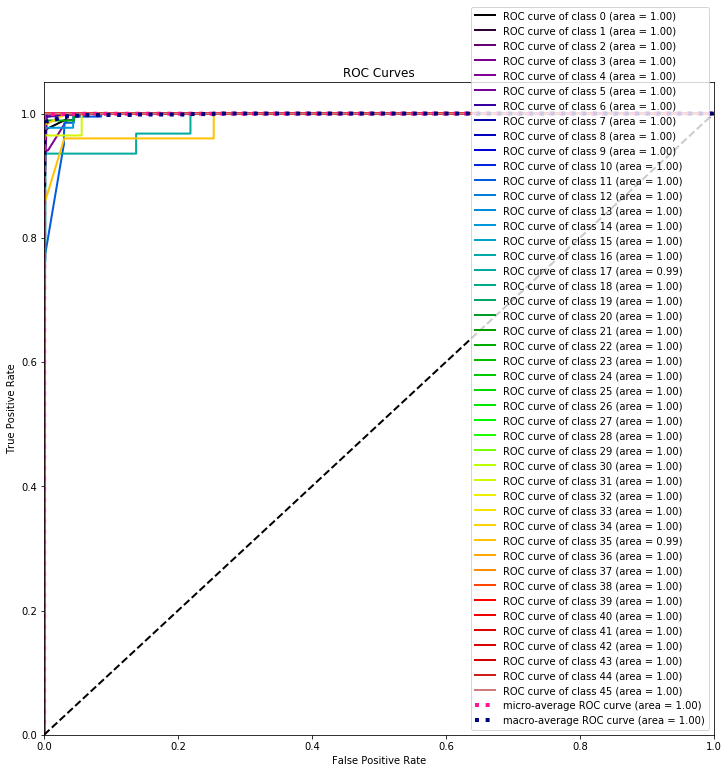

In [26]:
skplt.metrics.plot_roc(
    true_classes,
    predictions,
    figsize=(12,12))